# Análise de Componentes Principais Probabilísticas (PPCA)
---
A Análise de Componentes Principais (PCA) tem como objetivo combinar os atributos originais de um dataset em vetores de menor dimensão, reduzindo, assim, a dimensão dos dados. A idéia é encontrar uma matriz de projeção $\textbf{P} \in R^{L x D}$, a qual projeta um vetor $x_i \in R^D$ em $z_i \in R^L$, de forma que a variância dos dados projetados seja maximizada.

Seja $p_k \in R^D$ a *k-ésima* linha da matriz de projeção $\textbf{P}$, a variância dos dados projetados naquela componente, i.e., $z_{i1} = p_1^T x_i$ é:

$$ \sigma^2_1 = \frac{1}{N - 1} \sum^N_{i = 1}(p_1^T x_i - p_1^T \mu)^2 $$
$$\mu = \frac{1}{N} \sum^N_{i=1} x_i$$

A expressão acima pode ser trabalhada, de tal forma que a matriz de covariância $\Sigma$ dos dados originais apareça:

$$ \sigma^2_1 = p_1^T \Sigma p_1 $$
$$ \Sigma = \frac{1}{N - 1} \sum^N_{i = 1}(x_i - \mu)(x_i - \mu)^T $$

Ao tentar resolver a equação que maximiza a variância, encontramos que $\Sigma p_1 = \lambda_1 p_1$, sendo $\lambda_1$ corresponde ao maior autovalor de $\Sigma$ e, consequentemente, $p_1$ seu autovetor correspondente. Logo, podemos construir $\textbf{P}$ utilizando os autovetores correspondentes aos $L$ maiores autovalores.

### Uma perspectiva probabilística do PCA

Podemos pensar nos valores $z_i$ como variáveis latentes contínuas, as quais possuem distribuições Gaussianas. Seja $x \in R^D$ e $z \in R^L$, podemos definir uma priori Gaussiana para $z$, com média 0 e covariância 1:

$$ p(z) = \mathcal{N}(z | 0, I)$$

Para cada observação $x$, escolhemos uma probabilidade condicional também Gaussiana com uma relação linear com $z$:

$$ p(x | z) = \mathcal{N}(x | Wz + \mu, \sigma^2 I)$$

A partir da condicional, temos que a verossimilhança marginal da observação é dada por:

$$ p(x) = \int p(x | z) p(z) dz$$
$$ = \int \mathcal{N}(x | Wz + \mu, \sigma^2 I) \mathcal{N}(z | 0, I) dz$$
$$ = \mathcal{N}(x | \mu, W W^T + \sigma^2 I)$$

É importante ressaltar que $W$ não possui uma solução única. Suponha $\overline{W} = WR$, onde $R \in R^{LxL}$ é uma matriz ortogonal. Temos que:

$$ \overline{W} \overline{W}^T = WR(WR)^T = WRR^TW^T = WW^T $$

Logo, qualquer matriz de rotação ortogonal $R$ não altera o modelo.

Precisamos, então, encontrar valores para $W$, $\mu$ e $\sigma^2$ que maximizem a verossimilhança:

$$ \log p(X | W, \mu, \sigma^2) = \prod^N_{i=1} p(x_i | W, \mu, \sigma^2)$$

Realizando a otimização, podemos estimar os valores, de maneira analítica, com as seguintes equações:

$$ \mu = \frac{1}{N} \sum^N_{i=1}x_i $$

$$\sigma^2 = \frac{1}{D - L} \sum^D_{j = L + 1} \lambda_j $$

$$ W = V(\Lambda - \sigma^2 I)^{\frac{1}{2}}R $$

, onde:

- $V \in R^{DxL}$ é formada pelos $M$ autovetores da matriz de covariância $\Sigma$ das observações;
- $\Lambda \in R^{LxL}$ é uma matriz diagonal formada pelos $M$ maiores autovalores de $\Sigma$;
- $R \in R^{LxL}$ é uma matriz ortogonal qualquer (por simplicidade, podemos usar $R = I$).

A partir das estimações, podemos encontrar a psoteriori de $z_i$ de aneira analítica:

$$p(z_i | x_i) \propto \mathcal{N}(z_i | M^{-1} W^T (x_i - \mu), \sigma^2 M^{-1}) $$ 

$$ M = W^TW + \sigma^2 I $$

Dessa forma, temos a *Análise das Componentes Principais Probabilística* (PPCA)

In [1]:
%matplotlib inline
from sklearn import datasets
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

Inicialmente, vamos computar a média $\mu$ e a covariância $\Sigma$ dos dados

In [3]:
N,D = X.shape
mean = np.mean(X, axis=0)
cov = np.cov(X.T)
mean, cov

(array([5.84333333, 3.05733333, 3.758     , 1.19933333]),
 array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
        [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
        [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
        [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]]))

Em seguida, vamos computar os autovalores e autovetores da matriz

In [4]:
e_values, e_vectors = np.linalg.eigh(cov)
e_values = np.flip(e_values)
e_vectors = np.flip(e_vectors, axis=1)
e_vectors, e_values

(array([[-0.36138659,  0.65658877,  0.58202985,  0.31548719],
        [ 0.08452251,  0.73016143, -0.59791083, -0.3197231 ],
        [-0.85667061, -0.17337266, -0.07623608, -0.47983899],
        [-0.3582892 , -0.07548102, -0.54583143,  0.75365743]]),
 array([4.22824171, 0.24267075, 0.0782095 , 0.02383509]))

Vamos utilizar $L=2$, representando nossos dados em apenas 2 dimensões

In [5]:
L  = 2
V = e_vectors[:, :L]
Lambda = np.diag(e_values[:L])
V, Lambda

(array([[-0.36138659,  0.65658877],
        [ 0.08452251,  0.73016143],
        [-0.85667061, -0.17337266],
        [-0.3582892 , -0.07548102]]),
 array([[4.22824171, 0.        ],
        [0.        , 0.24267075]]))

Agora vamos estimar os valores de $W$, $\mu$ e $\sigma^2$:

$$ \mu = \frac{1}{N} \sum^N_{i=1}x_i $$

$$\sigma^2 = \frac{1}{D - M} \sum^D_{j = L + 1} \lambda_j $$

$$ W = V(\Lambda - \sigma^2 I)^{\frac{1}{2}}R $$

In [6]:
sigma = 1 / (D - L) * np.sum(e_values[L+1:])
sigma_I = sigma*np.eye(L)

W = V.dot(np.sqrt(Lambda - sigma_I))

M = W.T.dot(W) + sigma_I

Para projetar os dados no novo espaço, basta que calculemos a posteriori de $z_i$:

$$p(z_i | x_i) \propto \mathcal{N}(z_i | M^{-1} W^T (x_i - \mu), \sigma^2 M^{-1}) $$ 

$$ M = W^TW + \sigma^2 I $$

Por questões de simplicidade, podemos retornar $E[z_i] = M^{-1} W^T (x_i - \mu)$

In [7]:
def project(X, mean, M_inv, W, sigma):
    return M_inv.dot(W.T).dot((X - mean).T).T 

M_inv = np.linalg.inv(M)
z = project(X, mean, M_inv, W, sigma)
z.shape

(150, 2)

De maneira análoga, para encontrar o valor $x_i$ relacionado a uma projeção, basta que encontremos a probabilidade condicional de $x_i$ dado $z_i$:

$$ p(\overline{x}_i | z_i) = \mathcal{N}(\overline{x}_i | Wz_i + \mu, \sigma^2 I)$$

Assim como a projeção, vamos retornar apenas $E[\overline{x}_i] =  Wz_i + \mu$

In [8]:
def reconstruct(z, mean, W, sigma):
    return W.dot(z.T).T + mean

x = reconstruct(z, mean, W, sigma)
x[0]

array([5.07547401, 3.50532148, 1.4124142 , 0.21742624])

Podemos ver que o valor original de $x_i$ é bem próximo de seu valor "reconstruído" $\overline{x}_i$

In [9]:
np.abs(X[0] - x[0])

array([0.02452599, 0.00532148, 0.0124142 , 0.01742624])

Podemos, agora, visualizar os dados em um gráfico de dispersão 2D.

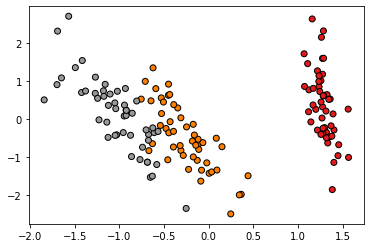

In [10]:
X_projected = project(X, mean, M_inv, W, sigma)
_ = plt.scatter(X_projected[:, 0], X_projected[:, 1], c=Y, cmap=plt.cm.Set1,
            edgecolor='k')

Dado um certo ponto $\overline{z}$, para sabermos se ele pertence ao espaço latente encontrado, basta que ele seja um dos valores $z$ projetados. Como estamos trabalhando com probabilidades e cada $z$ possui uma distribuição própria, basta que calculemos a probabilidade $p(z =\overline{z})$:

$$ p(\overline{z} | X, \mu, W, \sigma^2) \propto \sum^N_{i=1} \mathcal{N}(\overline{z} | M^{-1} W^T (x_i - \mu), \sigma^2 M^{-1}) $$

In [11]:
def space_likelihood(z, X, mean, M_inv, W, sigma):
    means = M_inv.dot(W.T).dot((X - mean).T).T
    new_sigma = sigma*M_inv
    
    s = 0
    for x, m in zip(X, means):
        s += multivariate_normal.pdf(z, mean=m, cov=new_sigma)
    
    return s
    
space_likelihood(X_projected[0], X, mean, M_inv, W, sigma)

96.63216460530208

100%|██████████| 40000/40000 [08:54<00:00, 74.87it/s]


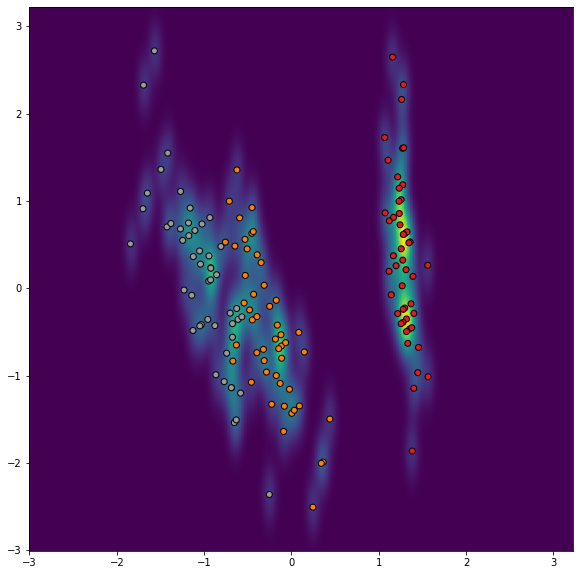

In [12]:
resolution = 200
margin = 0.5
x = y = np.linspace(X_projected.min()-margin,X_projected.max()+margin,resolution)
grid = np.dstack(np.meshgrid(x,y)).reshape(-1,2)

densities = np.array([space_likelihood(x, X, mean, M_inv, W, sigma) for x in tqdm(grid)]).reshape(resolution, resolution)
plt.figure(figsize=(10,10))
plt.imshow(densities, origin='lower', extent=(x[0],x[-1],y[0],y[-1]))
_ = plt.scatter(X_projected[:, 0], X_projected[:, 1], c=Y, cmap=plt.cm.Set1,
            edgecolor='k')

### Comparando com o PCA do sklearn

Vamos comparar o resultado do PPCA com o PCA. Para isso, usaremos a implementação do [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

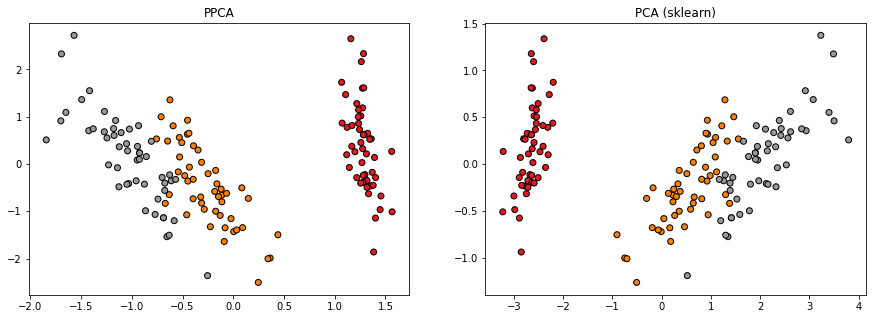

In [13]:
from sklearn.decomposition import PCA

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
X_projected = np.array([project(x, mean, M_inv, W, sigma) for x in X])
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=Y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.title("PPCA")

plt.subplot(1,2,2)
pca = PCA(n_components=2)
X_projected = pca.fit(X).transform(X)

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=Y, cmap=plt.cm.Set1,
            edgecolor='k')
_ = plt.title("PCA (sklearn)")

Como foi visto anteriormente, não existe uma única solução $W$ para o PPCA. Logo, podemos encontrar outras soluções simplesmente rotacionando $W$ com uma matriz de rotação ortogonal $R$.

Como sabemos o $W$ que desejamos encontrar (que é a matriz utilizada pelo PCA), podemos encontrar $R$ da seguinte forma:

$$ \overline{W} = WR,\\ R = (W^T W)^{-1} W^T \overline{W} $$

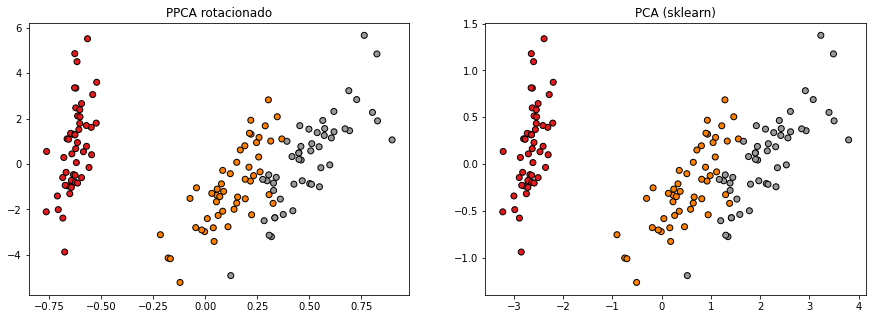

In [14]:
# estimando matriz de rotação
R = np.linalg.inv(W.T.dot(W)).dot(W.T).dot(pca.components_.T)

X_rot = project(X, mean, M_inv, W, sigma).dot(R)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(X_rot[:, 0], X_rot[:, 1], c=Y, cmap=plt.cm.Set1,
            edgecolor='k')
_ = plt.title(f"PPCA rotacionado")

plt.subplot(1,2,2)
X_projected = pca.fit(X).transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=Y, cmap=plt.cm.Set1,
            edgecolor='k')
_ = plt.title("PCA (sklearn)")

## Expectation Maximization

Podemos resolver o problema do PPCA utilizando a técnica de *expectation maximization*. Entretanto, é importante informar que a matriz $W$ encotnrada não é, necessariamente, ortogonal.

Como todo método de EM, começamos analisando a log-verossimilhança dos dados completos (observações e projeções):

$$\log p(X, Z | \mu, W, \sigma^2) = \sum^N_{i=1}[\log p(x_i | z_i) + \log p(z_i)]$$
$$= \sum^N_{i=1} [\log \mathcal{N}(x_i | W z_i + \mu, \sigma^2 I) + \log \mathcal{N}(z_i | 0, I)]$$
$$= - \sum^N_{i=1} \{\frac{D}{2} \log (2 \pi \sigma^2) + \frac{L}{2} \log (2 \pi) + \frac{1}{2} Tr(z_i z_i^T) \\
+ \frac{1}{2\sigma^2} ||x_i - \mu||^2 - \frac{1}{\sigma^2} z_i^T W^T (x_i - \mu) + \frac{1}{2 \sigma^2} Tr(z_i z_i^T W^T W)
\}$$

No passo E, precisamos calcular duas esperanças (que serão usadas na etapa M):

$$ E[z_i] = M^{-1} W^T (x - \mu)$$

$$ E[z_i z_i^T] = \sigma^2 M^{-1} + E[z_i] E[z_i]^T $$

No passo M, podemos estimar os valores de $W$ e $\sigma^2$ por:

$$ W_{new} = \left[ \sum^N_{i = 1} (x-\mu) E[z_i]^T\right] \left[ \sum^N_{i=1} E[z_i z_i^T] \right] ^{-1} $$

$$ \sigma^2 = \frac{1}{ND} \sum^N_{i=1} \{||x_i - \mu||^2 - 2E[z_i]^T W_{new}^T (x_i - \mu) + Tr(E[z_i z_i^T] W_{new}^T W_{new})\}$$

**OBS:** As funções de projeção e reconstrução se mantêm.

(array([[ 1.26845539, -3.0837874 ],
        [ 3.0314654 , -1.74472204],
        [-3.507668  , -2.483215  ],
        [-1.47821507, -1.03027697]]),
 0.05072384805905005,
 array([[ 0.03963948, -0.00201631],
        [-0.00201631,  0.05072361]]))

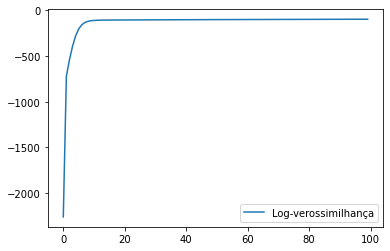

In [15]:
def log_likelihood(X, mean, W, M_inv, sigma):
    s = 0
    for x in X:
        z =  M_inv.dot(W.T).dot((x - mean))
        
        s += (D/2)*np.log(2*np.pi*sigma) + (L/2)*np.log(2*np.pi) + 0.5*np.trace(np.outer(z,z))
        s += (1/(2*sigma))*np.linalg.norm(x - mean)**2 - (1/sigma)*z.dot(W.T).dot(x-mean)
        s += 1/(2*sigma)*np.trace(np.outer(z,z).dot(W.T).dot(W))
        
    return -s
    
def fit(X, mean, W_0, sigma_0, iter=10, debug=False):
    
    W = W_0.copy()
    sigma = sigma_0
    M_inv = None
    
    log_likelihoods = []
    
    for i in range(iter):
        M_inv = np.linalg.inv(W.T.dot(W) + sigma*np.eye(L))

        e_z = M_inv.dot(W.T).dot((X - mean).T)
        e_zz = sigma*M_inv + e_z.dot(e_z.T)
        
        W = ((X - mean).T.dot(e_z.T)).dot(np.linalg.inv(e_zz))
        
        s = 0
        for i,x in enumerate(X):
            e_zi = e_z[:,i]
            e_zzi = sigma*M_inv + np.outer(e_zi, e_zi) 
            s += np.linalg.norm(x-mean)**2 - 2*e_zi.T.dot(W.T).dot(x-mean) + np.trace(e_zzi.dot(W.T).dot(W))
            
        sigma = s/(N*D)  

        log_likelihoods.append(log_likelihood(X, mean, W, M_inv, sigma))
        
        if debug:
            print("\n-----------------------------------\n")
            print(f"Iteração {i+1}")
            print(f"W:\n{W}")
            print(f"Sigma: {sigma}")
            print(f"Log-verossimilhança: {log_likelihoods[-1]}")
            
    return W, sigma, M_inv, log_likelihoods
    
W_0 = np.random.randn(D, L)
W_em, sigma_em, M_inv_em, log_likelihoods = fit(X, mean, W_0, 1, iter=100, debug=False)
plt.plot(log_likelihoods, label="Log-verossimilhança")
plt.legend()
W_em, sigma_em, M_inv_em

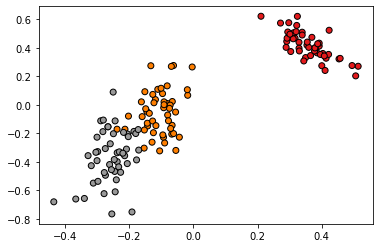

In [16]:
X_projected_em = project(X, mean, M_inv_em, W_em, sigma_em)
plt.scatter(X_projected_em[:, 0], X_projected_em[:, 1], c=Y, cmap=plt.cm.Set1,
            edgecolor='k')

100%|██████████| 40000/40000 [08:54<00:00, 74.79it/s]


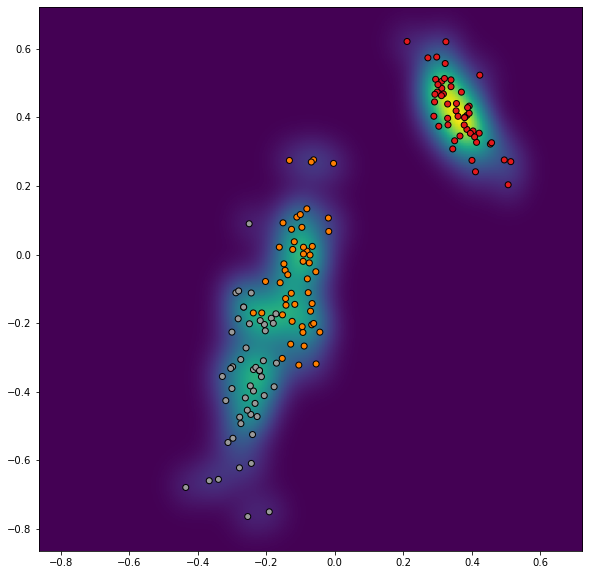

In [17]:
resolution = 200
margin = 0.1
x = y = np.linspace(X_projected_em.min()-margin,X_projected_em.max()+margin,resolution)
grid = np.dstack(np.meshgrid(x,y)).reshape(-1,2)

densities = np.array([space_likelihood(x, X, mean, M_inv_em, W_em, sigma_em) for x in tqdm(grid)]).reshape(resolution, resolution)
plt.figure(figsize=(10,10))
plt.imshow(densities, origin='lower', extent=(x[0],x[-1],y[0],y[-1]))
_ = plt.scatter(X_projected_em[:, 0], X_projected_em[:, 1], c=Y, cmap=plt.cm.Set1,
            edgecolor='k')

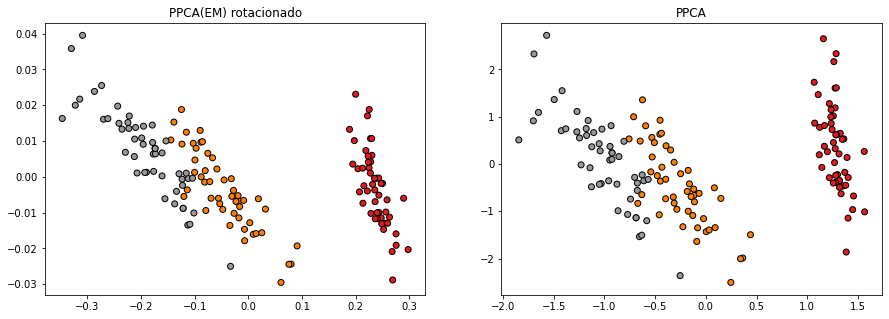

In [18]:
R = np.linalg.inv(W_em.T.dot(W_em)).dot(W_em.T).dot(W)

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
X_rot = project(X, mean, M_inv_em, W_em, sigma_em).dot(R)
plt.scatter(X_rot[:, 0], X_rot[:, 1], c=Y, cmap=plt.cm.Set1,
            edgecolor='k')
_ = plt.title(f"PPCA(EM) rotacionado")

plt.subplot(1,2,2)
X_projected = project(X, mean, M_inv, W, sigma)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=Y, cmap=plt.cm.Set1,
            edgecolor='k')
_ = plt.title("PPCA")